In [9]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np # version 1.16

# setup a virtual environment
# pipenv shell
# pip install tensorflow numpy==1.16 sklearn matplotlib

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
corpus_raw1 = 'He is the king . The king is royal . She is the royal  queen '
corpus_raw = ' Me gusta jugar fútbol con mis amigos'
# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

In [11]:

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
    print(sentence)
    #print(word2int['sentences.split()'])

 me gusta jugar fútbol con mis amigos


In [12]:
print(word2int['fútbol'])
print(word2int['con'])

0
6


Si el tamaño de la ventana  WINDOW_SIZE  es más grande  hay más posibilidad de encontrar más palabras cercanas  y el conjunto de entrenamiento crece.

In [13]:
WINDOW_SIZE = 3

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])
       

In [14]:
print(data)

[['me', 'gusta'], ['me', 'jugar'], ['me', 'fútbol'], ['gusta', 'me'], ['gusta', 'jugar'], ['gusta', 'fútbol'], ['gusta', 'con'], ['jugar', 'me'], ['jugar', 'gusta'], ['jugar', 'fútbol'], ['jugar', 'con'], ['jugar', 'mis'], ['fútbol', 'me'], ['fútbol', 'gusta'], ['fútbol', 'jugar'], ['fútbol', 'con'], ['fútbol', 'mis'], ['fútbol', 'amigos'], ['con', 'gusta'], ['con', 'jugar'], ['con', 'fútbol'], ['con', 'mis'], ['con', 'amigos'], ['mis', 'jugar'], ['mis', 'fútbol'], ['mis', 'con'], ['mis', 'amigos'], ['amigos', 'fútbol'], ['amigos', 'con'], ['amigos', 'mis']]


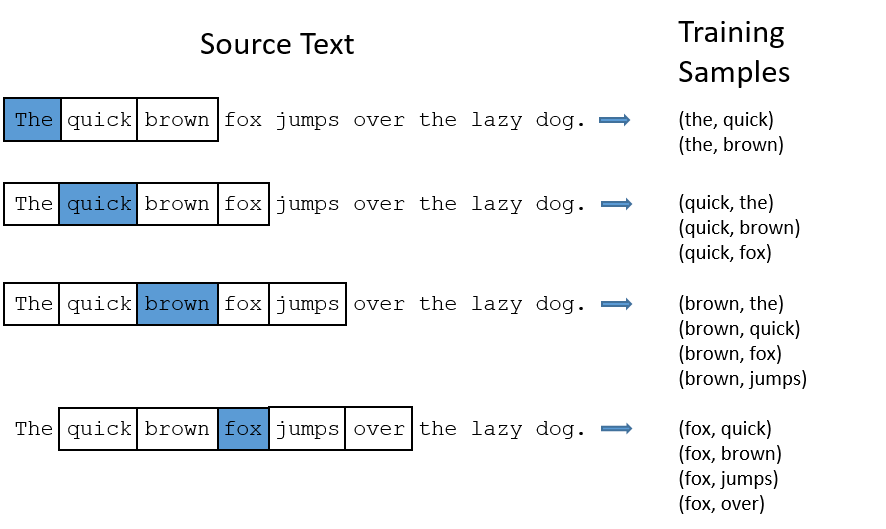

In [6]:
from IPython.display import Image
Image(filename='corpus-2.png')

In [15]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [16]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
    #print(data_word[0],y_train)
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print(x_train) 
#print('conjunto de entrenamiento---------')
#print(y_train)
print(x_train.shape, y_train.shape)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
(30, 7) (30, 7)


In [17]:
print(x_train.shape[0])
#puntos de entrenamiento, donde cada punto tiene 7 dimensiones, que crecen depeniendo de la ventana de contexto

30


In [18]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 10 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

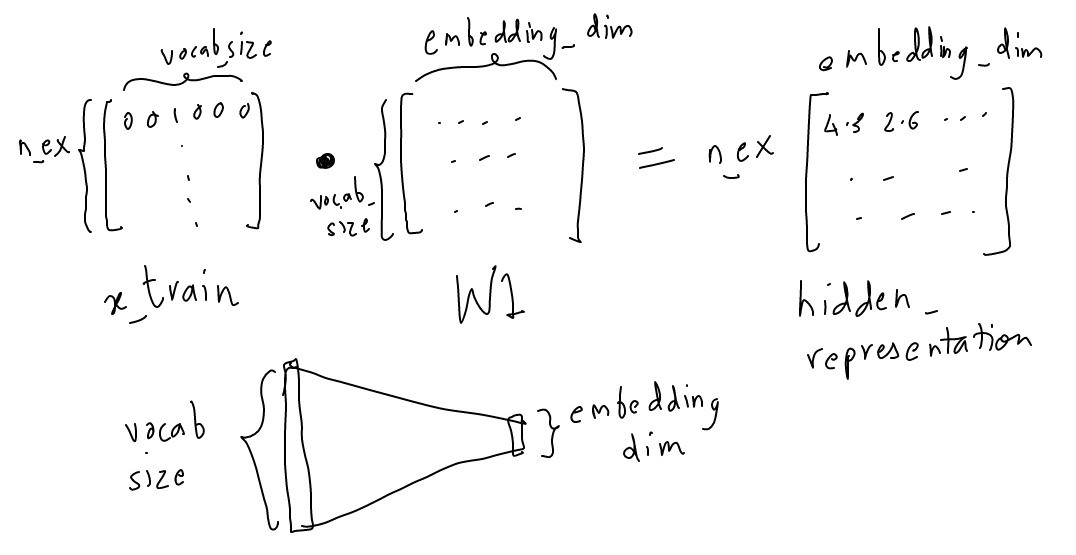

In [80]:
from IPython.display import Image
Image(filename='train-embedding.jpeg')
 
 

In [19]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

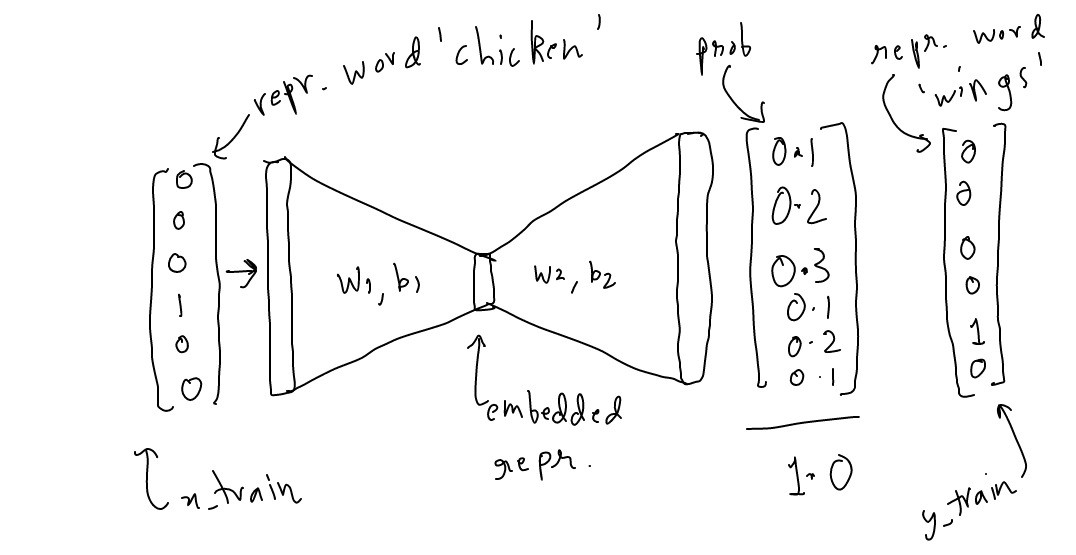

In [83]:
from IPython.display import Image
Image(filename='training-embedding1.jpeg')

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 100
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  5.8429112
loss is :  5.474028
loss is :  5.160271
loss is :  4.8837566
loss is :  4.634745
loss is :  4.4080048
loss is :  4.201588
loss is :  4.0159016
loss is :  3.852084
loss is :  3.7096026
loss is :  3.5853586
loss is :  3.4753852
loss is :  3.3764293
loss is :  3.2861824
loss is :  3.2030482
loss is :  3.1259184
loss is :  3.0540137
loss is :  2.9867733
loss is :  2.923774
loss is :  2.8646772
loss is :  2.809191
loss is :  2.7570486
loss is :  2.7079976
loss is :  2.6617944
loss is :  2.618205
loss is :  2.5770056
loss is :  2.5379894
loss is :  2.500965
loss is :  2.465761
loss is :  2.432224
loss is :  2.4002187
loss is :  2.3696272
loss is :  2.3403451
loss is :  2.3122828
loss is :  2.2853606
loss is :  2.2595077
loss is :  2.2346635
loss is :  2.2107723
loss is :  2.1877854
loss is :  2.165658
loss is :  2.1443508
loss is :  2.123826
loss is :  2.1040514
loss is :  2.0849948
loss is :  2.0666273
loss is :  2.048922
loss is :  2.0318532
loss is :  2.0153966
loss i


Eventualmente se estabiliza en una pérdida constante. Aunque no podemos obtener una alta precisión, no nos importa. Todo lo que nos interesa es W1 y b1, es decir, las representaciones ocultas.


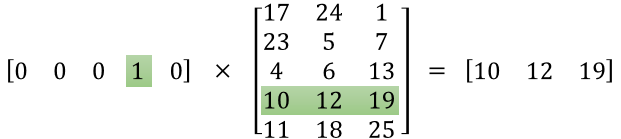

In [99]:
from IPython.display import Image
Image(filename='one-hot.png')

In [21]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 1.8643064  -0.3155481   0.8310172  -1.6659393   0.8333837  -0.50594425
  -0.7029339  -0.5536147   0.64956874 -1.1331846 ]
 [ 0.9585857  -1.4814333   0.48349562 -1.5452626  -1.1702965  -0.36645466
   0.07794312 -1.2986094   0.16158125 -0.8072512 ]
 [ 0.60520756 -0.18740673 -0.762696   -0.2362796  -1.0396659  -2.6302063
   1.2853795  -0.6663846  -0.22508024  0.6765911 ]
 [-0.341677    1.0363123   0.6272982  -0.99581873 -0.49012542 -0.23172554
  -1.1632646  -0.56079876  0.4650523  -0.7741673 ]
 [-0.00718862 -0.21603727  0.9594931  -3.300948   -0.54389423 -0.597036
   1.3477604  -0.10349844  0.03604291 -0.44504443]
 [-0.6182359   1.3937043  -2.8701222  -0.90284705 -0.44126245  0.03849363
  -0.0645646   0.03741404  0.3570279  -0.03902314]
 [ 0.14654404  0.80997074 -1.1680279   0.10689966 -0.8021037  -1.2116089
  -0.18170053  0.9604717   0.5885346   1.5587448 ]]
----------
[ 0.00500403  1.0454059   0.17254792  0.03471282  0.39775845 -0.35151172
 -1.4753956   1.5291687   0.3524879   1.2129

In [23]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)


[[ 1.8693105e+00  7.2985780e-01  1.0035651e+00 -1.6312265e+00
   1.2311422e+00 -8.5745597e-01 -2.1783295e+00  9.7555405e-01
   1.0020566e+00  7.9728246e-02]
 [ 9.6358973e-01 -4.3602741e-01  6.5604353e-01 -1.5105498e+00
  -7.7253807e-01 -7.1796638e-01 -1.3974525e+00  2.3055935e-01
   5.1406914e-01  4.0566158e-01]
 [ 6.1021161e-01  8.5799915e-01 -5.9014809e-01 -2.0156679e-01
  -6.4190745e-01 -2.9817181e+00 -1.9001603e-01  8.6278415e-01
   1.2740766e-01  1.8895040e+00]
 [-3.3667296e-01  2.0817182e+00  7.9984611e-01 -9.6110594e-01
  -9.2366964e-02 -5.8323729e-01 -2.6386602e+00  9.6836996e-01
   8.1754017e-01  4.3874550e-01]
 [-2.1845871e-03  8.2936859e-01  1.1320410e+00 -3.2662351e+00
  -1.4613578e-01 -9.4854772e-01 -1.2763512e-01  1.4256703e+00
   3.8853079e-01  7.6786840e-01]
 [-6.1323184e-01  2.4391103e+00 -2.6975744e+00 -8.6813426e-01
  -4.3504000e-02 -3.1301808e-01 -1.5399601e+00  1.5665828e+00
   7.0951581e-01  1.1738896e+00]
 [ 1.5154807e-01  1.8553766e+00 -9.9547994e-01  1.4161247e

In [24]:
print(vectors[ word2int['jugar'] ])
# say here word2int['queen'] is 2

[-2.1845871e-03  8.2936859e-01  1.1320410e+00 -3.2662351e+00
 -1.4613578e-01 -9.4854772e-01 -1.2763512e-01  1.4256703e+00
  3.8853079e-01  7.6786840e-01]


Normalización TSNE para dibujar los vectores de dimensión 10 en vectores en R X R

In [25]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, '12')

print(vectors)

[[-0.44168463  0.89717036]
 [-0.9681673   0.25030422]
 [ 0.27932444  0.96019673]
 [ 0.86206335  0.5068005 ]
 [-0.42587128 -0.9047838 ]
 [ 0.17900556  0.9838481 ]
 [ 0.91525096 -0.4028841 ]]


{'fútbol', 'me', 'mis', 'amigos', 'jugar', 'gusta', 'con'}
fútbol 0.89717036
me 0.25030422
mis 0.96019673
amigos 0.5068005
jugar -0.9047838
gusta 0.9838481
con -0.4028841


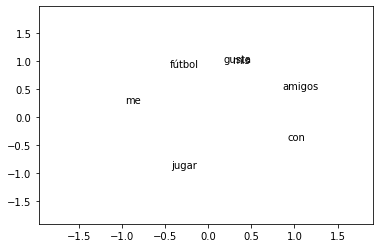

In [26]:



import matplotlib.pyplot as plt


fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    ax.set_xlim(min([vectors[word2int[w]][0] for w in words])-1, max([vectors[word2int[w]][0] for w in words])+1)
    ax.set_ylim(min([vectors[word2int[w]][1] for w in words])-1, max([vectors[word2int[w]][1] for w in words])+1)
plt.show()